# Support Vector Machines on the Fashion MNIST Dataset

In this assignment, you will apply Support Vector Classifier (SVC) to the Fashion MNIST dataset, which consists of 28x28 grayscale images of fashion products. The dataset is built into TensorFlow and Keras, but can also be fetched via `sklearn.datasets`. Since the dataset is meant for classification, we will not use SVR in this case.



## Loading the Dataset

Fashion MNIST dataset can be loaded from TensorFlow/Keras datasets. If you don't have TensorFlow/Keras installed, you can use the OpenML version of the dataset.

In [3]:
# Load the Fashion MNIST dataset
# It's a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples.
# Each example is a 28x28 grayscale image, associated with a label from 10 classes
from sklearn.datasets import fetch_openml
f_mnist = fetch_openml('Fashion-MNIST')
X, y = f_mnist["data"], f_mnist["target"]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
print(X.shape, y.shape)

(70000, 784) (70000,)


## Preprocessing the Data
Preprocessing involves reshaping the images and splitting the dataset into training and testing sets. Additionally, feature scaling is essential for SVMs.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets (let's take a smaller subset to speed up the training process)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

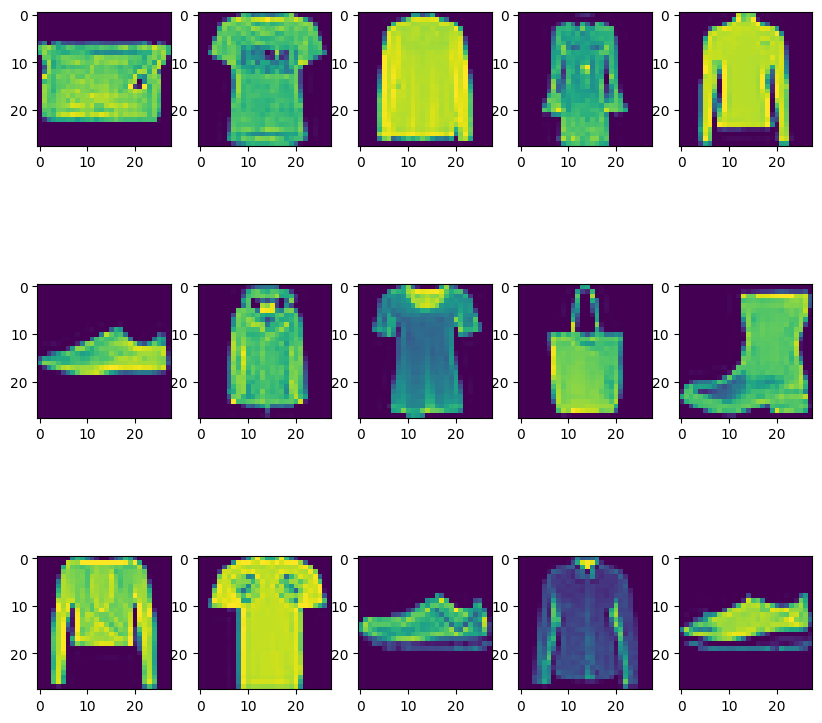

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(3,5, i+1)
    plt.imshow(np.array(X_train.iloc[i, :]).reshape(28,28))
plt.show()

## Training the SVC Model
We'll start with a linear kernel to see how it performs on this dataset.

In [18]:
from sklearn.svm import SVC

# Create an instance of the SVC class with a linear kernel
svc_linear = SVC(kernel='linear')

# TASK: Train the SVC model on the training data
# Your code here:
svc_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

# TASK: Make predictions and evaluate the accuracy
# Your code here:
y_pred = svc_linear.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy with linear kernel: {accuracy*100:.2f}%")

Accuracy with linear kernel: 84.61%


Accuracy with linear kernel: 84.61%


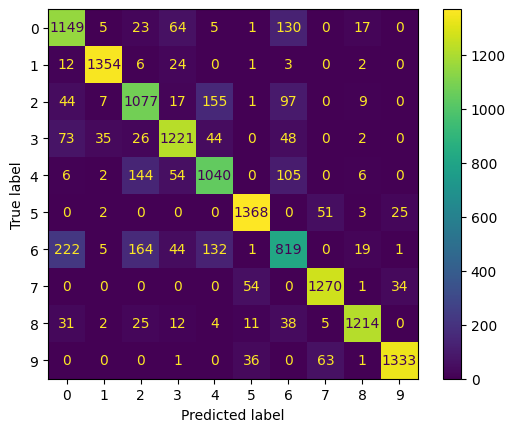

In [15]:
# TASK: Compute and display the confusion matrix
# Your code here:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
# print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


## Hyperparameter Tuning
Tuning hyperparameters is crucial for SVMs. We'll focus on the regularization parameter C and the kernel type.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# TASK: Use GridSearchCV to find the best hyperparameters for the SVC
# Your code here:
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


## Conclusion
You have now trained an SVC model on the Fashion MNIST dataset, made predictions, evaluated the accuracy, and tuned the hyperparameters to potentially improve the model. Reflect on how different kernels and the regularization parameter C affect the model's performance. You can also compare your result with training another model.